Objective: Explore and analyze social media ads dataset to uncover insights on ad platforms, ad types, and target audiences

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [31]:

# Load the datasets
users = pd.read_csv('https://raw.githubusercontent.com/Rishabh1108ch/Social_media_Ads_Performance_Gradient-Boosting_Analysis/refs/heads/main/users.csv', encoding='ascii', delimiter=',')
ads = pd.read_csv('https://raw.githubusercontent.com/Rishabh1108ch/Social_media_Ads_Performance_Gradient-Boosting_Analysis/8e593f32e14baf2f8772b3bf916c09c82e15b433/ads.csv', encoding='ascii', delimiter=',')
ad_events = pd.read_csv('https://raw.githubusercontent.com/Rishabh1108ch/Social_media_Ads_Performance_Gradient-Boosting_Analysis/8e593f32e14baf2f8772b3bf916c09c82e15b433/ad_events.csv', encoding='ascii', delimiter=',')
campaigns = pd.read_csv('https://raw.githubusercontent.com/Rishabh1108ch/Social_media_Ads_Performance_Gradient-Boosting_Analysis/8e593f32e14baf2f8772b3bf916c09c82e15b433/campaigns.csv', delimiter=',')

# Quick check
# Display the first few records from each dataset (for debugging purposes)
print('Users shape:', users.shape)
print('Ads shape:', ads.shape)
print('Ad Events shape:', ad_events.shape)
print('Campaigns shape:', campaigns.shape)



Users shape: (10000, 7)
Ads shape: (200, 7)
Ad Events shape: (400000, 7)
Campaigns shape: (50, 6)


In [32]:
users.head()

,user_id,user_gender,user_age,age_group,country,location,interests
0,a2474,Female,24,18-24,United Kingdom,New Mariomouth,"fitness, health"
1,141e5,Male,21,18-24,Germany,Danielsfort,"food, fitness, lifestyle"
2,34db0,Male,27,25-34,Australia,Vincentchester,"fashion, news"
3,20d08,Female,28,25-34,India,Lisaport,"health, news, finance"
4,9e830,Male,28,25-34,United States,Brownmouth,"health, photography, lifestyle"


In [33]:
ad_events.head()

,event_id,ad_id,user_id,timestamp,day_of_week,time_of_day,event_type
0,1,197,2359b,2025-07-26 00:19:56,Saturday,Night,Like
1,2,51,f9c67,2025-06-15 08:28:07,Sunday,Morning,Share
2,3,46,5b868,2025-06-27 00:40:02,Friday,Night,Impression
3,4,166,3d440,2025-06-05 19:20:45,Thursday,Evening,Impression
4,5,52,68f1a,2025-07-22 08:30:29,Tuesday,Morning,Impression


In [34]:
ads.head()


,ad_id,campaign_id,ad_platform,ad_type,target_gender,target_age_group,target_interests
0,1,28,Facebook,Video,Female,35-44,"art, technology"
1,2,33,Facebook,Stories,All,25-34,"travel, photography"
2,3,20,Instagram,Carousel,All,25-34,technology
3,4,28,Facebook,Stories,Female,25-34,news
4,5,24,Instagram,Image,Female,25-34,news


In [35]:
campaigns.head()

,campaign_id,name,start_date,end_date,duration_days,total_budget
0,1,Campaign_1_Launch,2025-05-25,2025-07-23,59,24021.32
1,2,Campaign_2_Launch,2025-04-16,2025-07-07,82,79342.41
2,3,Campaign_3_Winter,2025-05-04,2025-06-29,56,14343.25
3,4,Campaign_4_Summer,2025-06-04,2025-08-08,65,45326.60
4,5,Campaign_5_Launch,2025-07-11,2025-08-28,48,68376.69


In [36]:
ad_events.info()
ads.info()
campaigns.info()
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   event_id     400000 non-null  int64 
 1   ad_id        400000 non-null  int64 
 2   user_id      400000 non-null  object
 3   timestamp    400000 non-null  object
 4   day_of_week  400000 non-null  object
 5   time_of_day  400000 non-null  object
 6   event_type   400000 non-null  object
dtypes: int64(2), object(5)
memory usage: 21.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ad_id             200 non-null    int64 
 1   campaign_id       200 non-null    int64 
 2   ad_platform       200 non-null    object
 3   ad_type           200 non-null    object
 4   target_gender     200 non-null    object
 5   target_age_group  200 non-null

In [37]:
# Convert date columns to datetime format in campaigns dataset
campaigns['start_date'] = pd.to_datetime(campaigns['start_date'], errors='coerce')
campaigns['end_date'] = pd.to_datetime(campaigns['end_date'], errors='coerce')

# Convert timestamp in ad_events to datetime. The file description implies a string type, infer datetime if possible
ad_events['timestamp'] = pd.to_datetime(ad_events['timestamp'], errors='coerce')

In [38]:
ad_events.info()
campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   event_id     400000 non-null  int64         
 1   ad_id        400000 non-null  int64         
 2   user_id      400000 non-null  object        
 3   timestamp    400000 non-null  datetime64[ns]
 4   day_of_week  400000 non-null  object        
 5   time_of_day  400000 non-null  object        
 6   event_type   400000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 21.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   campaign_id    50 non-null     int64         
 1   name           50 non-null     object        
 2   start_date     50 non-null     datetime64[ns]
 3   end_date

In [39]:
# Check for missing values in each dataframe
print('Missing values in users:\n', users.isnull().sum())
print('Missing values in ads:\n', ads.isnull().sum())
print('Missing values in ad_events:\n', ad_events.isnull().sum())
print('Missing values in campaigns:\n', campaigns.isnull().sum())

Missing values in users:
 user_id        0
user_gender    0
user_age       0
age_group      0
country        0
location       0
interests      0
dtype: int64
Missing values in ads:
 ad_id               0
campaign_id         0
ad_platform         0
ad_type             0
target_gender       0
target_age_group    0
target_interests    0
dtype: int64
Missing values in ad_events:
 event_id       0
ad_id          0
user_id        0
timestamp      0
day_of_week    0
time_of_day    0
event_type     0
dtype: int64
Missing values in campaigns:
 campaign_id      0
name             0
start_date       0
end_date         0
duration_days    0
total_budget     0
dtype: int64


In [40]:
# Exploratory Data Analysis (EDA)

# Overview of the 'users' dataset
print('Users Dataset Overview:')
print(users.info())
print(users.describe())

# Overview of the 'ads' dataset
print('\nAds Dataset Overview:')
print(ads.info())
print(ads.describe(include='all'))

# Overview of the 'ad_events' dataset
print('\nAd Events Dataset Overview:')
print(ad_events.info())
print(ad_events['event_type'].value_counts())

# Overview of the 'campaigns' dataset
print('\nCampaigns Dataset Overview:')
print(campaigns.info())
print(campaigns.describe())

# Merge example: We can merge users with ad_events (via user_id) to get a combined view
merged_df = pd.merge(ad_events, users, on='user_id', how='left')
print('\nMerged ad_events with users, resulting shape:', merged_df.shape)

# This merge helps us correlate user demographics with ad events.

Users Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      10000 non-null  object
 1   user_gender  10000 non-null  object
 2   user_age     10000 non-null  int64 
 3   age_group    10000 non-null  object
 4   country      10000 non-null  object
 5   location     10000 non-null  object
 6   interests    10000 non-null  object
dtypes: int64(1), object(6)
memory usage: 547.0+ KB
None
           user_age
count  10000.000000
mean      27.646900
std        8.311686
min       16.000000
25%       21.000000
50%       26.000000
75%       32.000000
max       65.000000

Ads Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ad_id             200 non-null    int64

In [41]:


merged_df.head()


,event_id,ad_id,user_id,timestamp,day_of_week,time_of_day,event_type,user_gender,user_age,age_group,country,location,interests
0,1,197,2359b,2025-07-26 00:19:56,Saturday,Night,Like,Female,24,18-24,United States,West Shawna,"gaming, food"
1,2,51,f9c67,2025-06-15 08:28:07,Sunday,Morning,Share,Female,30,25-34,United States,Meyersland,"photography, finance"
2,3,46,5b868,2025-06-27 00:40:02,Friday,Night,Impression,Male,20,18-24,United States,Barrerahaven,"fashion, sports, travel"
3,4,166,3d440,2025-06-05 19:20:45,Thursday,Evening,Impression,Female,18,18-24,United States,Lake Angelaland,"food, art"
4,5,52,68f1a,2025-07-22 08:30:29,Tuesday,Morning,Impression,Male,58,55-65,United Kingdom,Robinsonberg,"finance, lifestyle"


In [42]:
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403967 entries, 0 to 403966
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   event_id     403967 non-null  int64         
 1   ad_id        403967 non-null  int64         
 2   user_id      403967 non-null  object        
 3   timestamp    403967 non-null  datetime64[ns]
 4   day_of_week  403967 non-null  object        
 5   time_of_day  403967 non-null  object        
 6   event_type   403967 non-null  object        
 7   user_gender  403967 non-null  object        
 8   user_age     403967 non-null  int64         
 9   age_group    403967 non-null  object        
 10  country      403967 non-null  object        
 11  location     403967 non-null  object        
 12  interests    403967 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 40.1+ MB


In [43]:
merged_df.describe()


,event_id,ad_id,timestamp,user_age
count,403967.000000,403967.000000,403967,403967.000000
mean,200034.495771,100.524857,2025-06-22 01:10:07.907781632,27.689334
min,1.000000,1.000000,2025-05-07 14:11:57,16.000000
25%,100030.500000,51.000000,2025-05-30 07:56:23,21.000000
50%,200044.000000,101.000000,2025-06-22 00:12:50,27.000000
75%,300051.500000,151.000000,2025-07-14 19:46:19.500000,32.000000
max,400000.000000,200.000000,2025-08-06 14:11:30,65.000000
std,115476.514725,57.781894,NaN,8.320411


In [44]:

merged_df.isnull().sum()

,0
event_id,0
ad_id,0
user_id,0
timestamp,0
day_of_week,0
time_of_day,0
event_type,0
user_gender,0
user_age,0
age_group,0


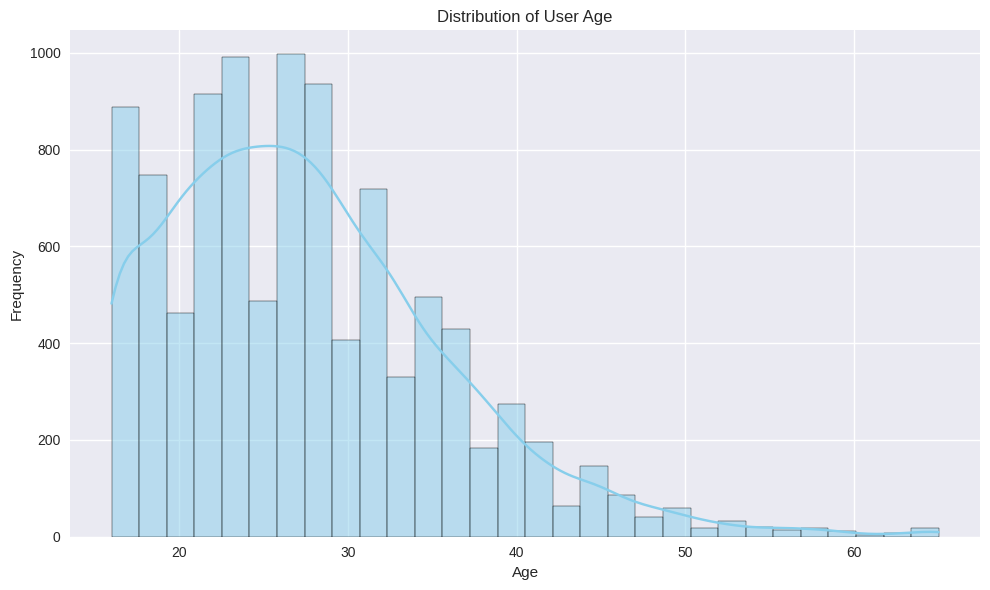

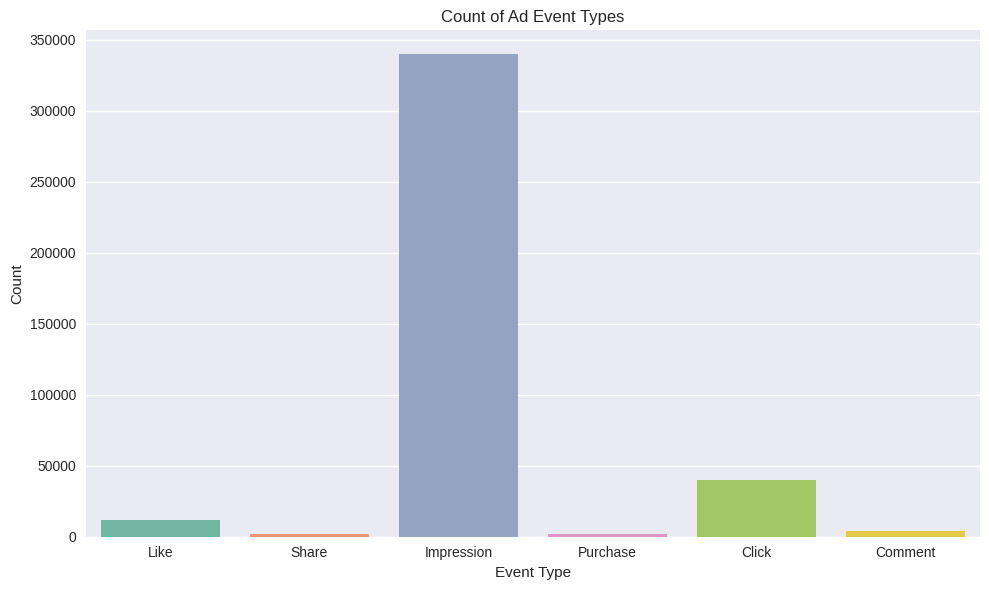

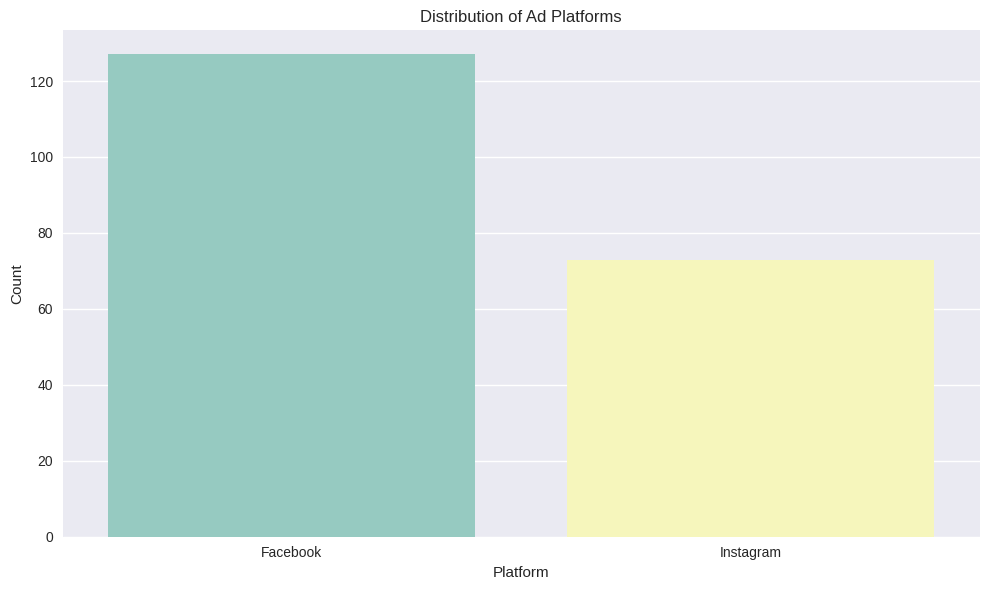

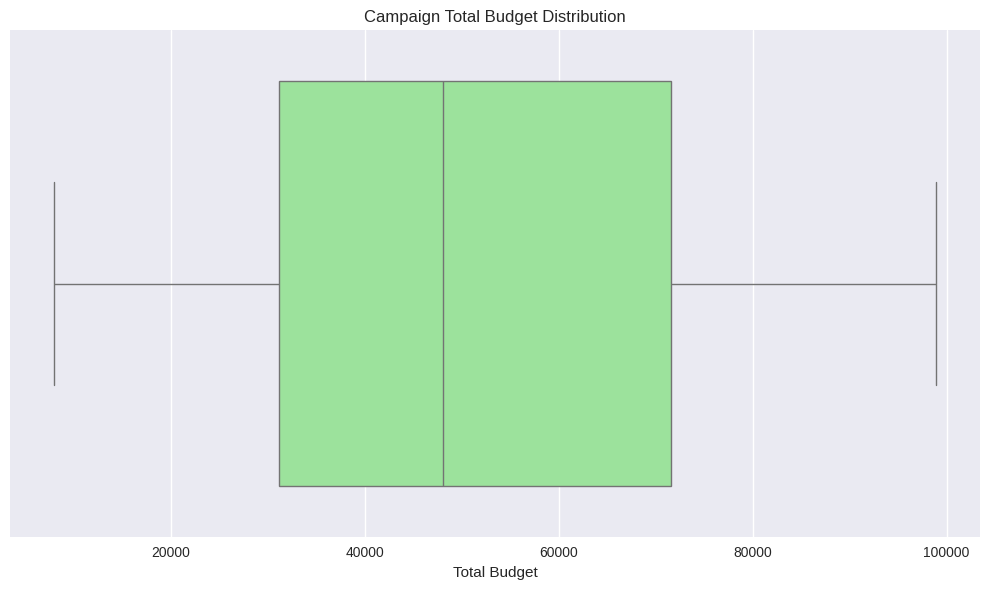

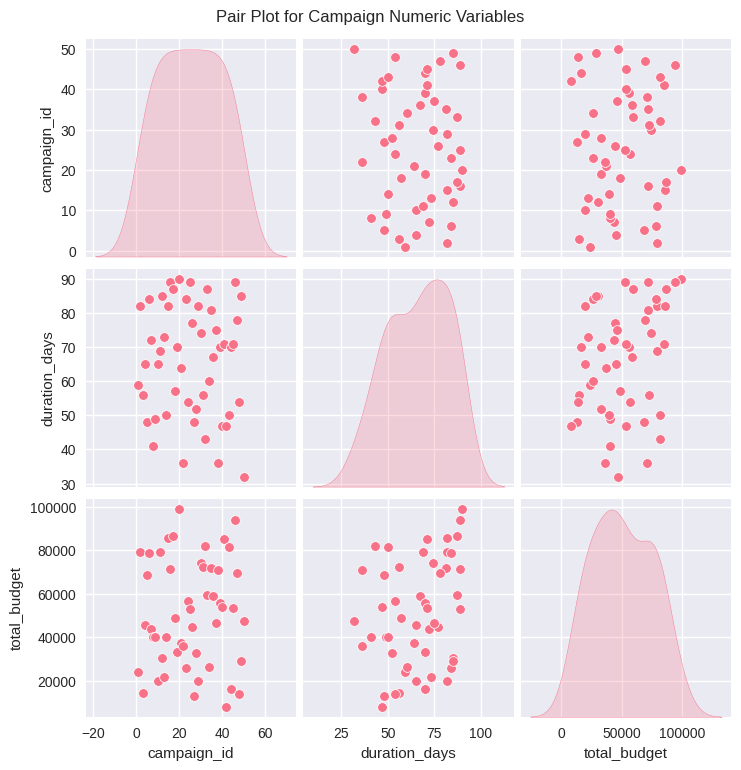

In [45]:
# Data Visualization

plt.figure(figsize=(10, 6))
# Histogram for user_age from the users dataset
sns.histplot(users['user_age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
#plt.savefig('user_age_histogram.png')
#plt.clf()
plt.show()

# Count plot for event_type from ad_events dataset
plt.figure(figsize=(10, 6))
sns.countplot(data=ad_events, x='event_type', palette='Set2')
plt.title('Count of Ad Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.tight_layout()
#plt.savefig('ad_event_type_count.png')
#plt.clf()
plt.show()

# Count plot for ad_platform in ads dataset
plt.figure(figsize=(10, 6))
sns.countplot(data=ads, x='ad_platform', palette='Set3')
plt.title('Distribution of Ad Platforms')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.tight_layout()
#plt.savefig('ad_platform_distribution.png')
#plt.clf()
plt.show()

# Box plot for campaign total budget distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=campaigns['total_budget'], color='lightgreen')
plt.title('Campaign Total Budget Distribution')
plt.xlabel('Total Budget')
plt.tight_layout()
#plt.savefig('campaign_total_budget_boxplot.png')
#plt.clf()
plt.show()

# Pair Plot on numeric columns in campaigns (campaign_id, duration_days, total_budget)
numeric_campaigns = campaigns.select_dtypes(include=[np.number])
sns.pairplot(numeric_campaigns, diag_kind='kde')
plt.suptitle('Pair Plot for Campaign Numeric Variables', y=1.02)
#plt.savefig('campaigns_pairplot.png')
#plt.clf()
plt.show()

Predictive Modeling
Given the available data, predicting whether a particular ad event is a 'click' can provide useful insights for advertisers. Here we build a simple predictor using logistic regression. Our approach involves merging multiple datasets, encoding categorical variables, training a model and evaluating its performance. Dry humor aside, sometimes the data just clicks.

Prediction Accuracy: 0.849317729325499


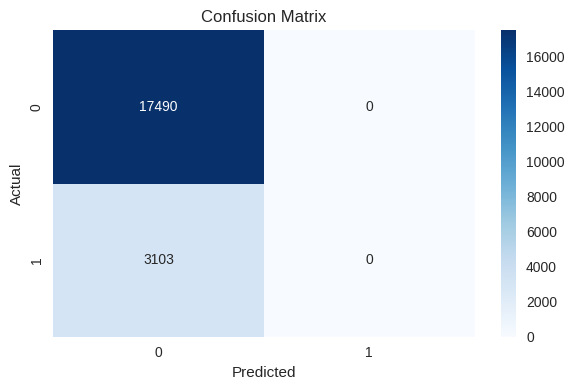

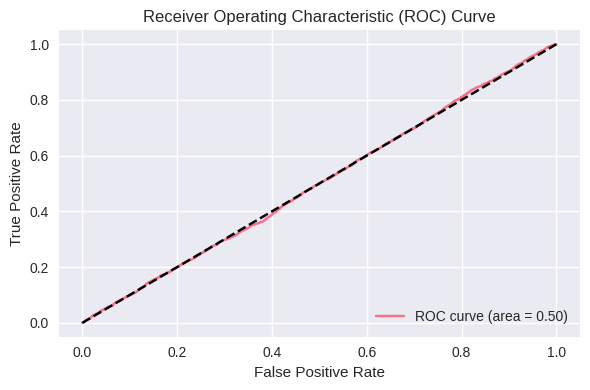

In [46]:
# Predictive Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


# Load and merge data using the defined function
df_model, _, _, _, _ = load_and_merge_data(
    '/content/ads_Analysis/ad_events.csv',
    '/content/ads_Analysis/ads.csv',
    '/content/ads_Analysis/campaigns.csv',
    '/content/ads_Analysis/users.csv'
)


# For simplicity, select a subset of features.
# We use user_age, user_gender, target_gender, day_of_week and ad_platform as predictors.
features = ['user_age', 'user_gender', 'target_gender', 'day_of_week', 'ad_platform']
df_model = df_model.dropna(subset=features + ['is_conversion']) # Use 'is_conversion' as target

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_model[features], drop_first=True)

# Target variable
y = df_model['is_conversion'] # Use 'is_conversion' as target

# Ensure our feature set is aligned
X = df_encoded

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the logistic regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Prediction Accuracy:', accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
#plt.clf()
plt.show()

# ROC Curve
y_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('roc_curve.png')
#plt.clf()
plt.show()

In [47]:
!pip install catboost

In [48]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from catboost import CatBoostClassifier

# Initialize styles for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load and merge data
#def load_and_merge_data(events_file, ads_file, campaigns_file, users_file):
    # Load all files
    #events_df = pd.read_csv(events_file, encoding='ascii', delimiter=',')
    #ads_df = pd.read_csv(ads_file, encoding='ascii', delimiter=',')
    #campaigns_df = pd.read_csv(campaigns_file, encoding='ascii', delimiter=',')
    #users_df = pd.read_csv(users_file, encoding='ascii', delimiter=',')
users = pd.read_csv('https://raw.githubusercontent.com/Rishabh1108ch/Social_media_Ads_Performance_Gradient-Boosting_Analysis/8e593f32e14baf2f8772b3bf916c09c82e15b433/users.csv', encoding='ascii', delimiter=',')
ads = pd.read_csv('https://raw.githubusercontent.com/Rishabh1108ch/Social_media_Ads_Performance_Gradient-Boosting_Analysis/8e593f32e14baf2f8772b3bf916c09c82e15b433/ads.csv', encoding='ascii', delimiter=',')
ad_events = pd.read_csv('https://raw.githubusercontent.com/Rishabh1108ch/Social_media_Ads_Performance_Gradient-Boosting_Analysis/8e593f32e14baf2f8772b3bf916c09c82e15b433/ad_events.csv', encoding='ascii', delimiter=',')
campaigns = pd.read_csv('https://raw.githubusercontent.com/Rishabh1108ch/Social_media_Ads_Performance_Gradient-Boosting_Analysis/8e593f32e14baf2f8772b3bf916c09c82e15b433/campaigns.csv', encoding='ascii', delimiter=',')

    #user_df = users.copy()
    #ads_df = ads.copy()
    #campaigns_df = campaigns.copy()
    #vents_df = events.copy()


users_df = users
ads_df = ads
campaigns_df = campaigns
events_df = ad_events

In [49]:
ads_df.head()

,ad_id,campaign_id,ad_platform,ad_type,target_gender,target_age_group,target_interests
0,1,28,Facebook,Video,Female,35-44,"art, technology"
1,2,33,Facebook,Stories,All,25-34,"travel, photography"
2,3,20,Instagram,Carousel,All,25-34,technology
3,4,28,Facebook,Stories,Female,25-34,news
4,5,24,Instagram,Image,Female,25-34,news


In [50]:
events_df.head()

,event_id,ad_id,user_id,timestamp,day_of_week,time_of_day,event_type
0,1,197,2359b,2025-07-26 00:19:56,Saturday,Night,Like
1,2,51,f9c67,2025-06-15 08:28:07,Sunday,Morning,Share
2,3,46,5b868,2025-06-27 00:40:02,Friday,Night,Impression
3,4,166,3d440,2025-06-05 19:20:45,Thursday,Evening,Impression
4,5,52,68f1a,2025-07-22 08:30:29,Tuesday,Morning,Impression


In [51]:
events_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   event_id     400000 non-null  int64 
 1   ad_id        400000 non-null  int64 
 2   user_id      400000 non-null  object
 3   timestamp    400000 non-null  object
 4   day_of_week  400000 non-null  object
 5   time_of_day  400000 non-null  object
 6   event_type   400000 non-null  object
dtypes: int64(2), object(5)
memory usage: 21.4+ MB


In [52]:
#Convert data types
events_df['timestamp'] = pd.to_datetime(events_df['timestamp'], errors='coerce')

In [53]:
campaigns_df['start_date'] = pd.to_datetime(campaigns_df['start_date'], errors='coerce')
campaigns_df['end_date'] = pd.to_datetime(campaigns_df['end_date'], errors='coerce')


In [54]:


  # Merge data
df = events_df.merge(ads_df, on='ad_id', how='left')
df = df.merge(campaigns_df, on='campaign_id', how='left')
df = df.merge(users_df, on='user_id', how='left')

    # Create additional features
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour
df['day_of_month'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['day_of_year'] = df['timestamp'].dt.dayofyear

    # Calculate time since campaign start
df['days_since_campaign_start'] = (df['timestamp'] - df['start_date']).dt.days
df['days_until_campaign_end'] = (df['end_date'] - df['timestamp']).dt.days

    # Create binary target variable
df['is_conversion'] = df['event_type'].isin(['Click', 'Purchase', 'Share', 'Comment', 'Like']).astype(int)

    # Additional features
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

 #return df, events_df, ads_df, campaigns_df, users_df

In [55]:
# EDA and visualization
def perform_eda(df):
    print("=== BASIC DATA INFORMATION ===")
    print(f"Combined data size: {df.shape}")

    print("\n=== STATISTICS ===")
    print(df.describe(include='all'))

    print("\n=== MISSING VALUES ===")
    print(df.isnull().sum())

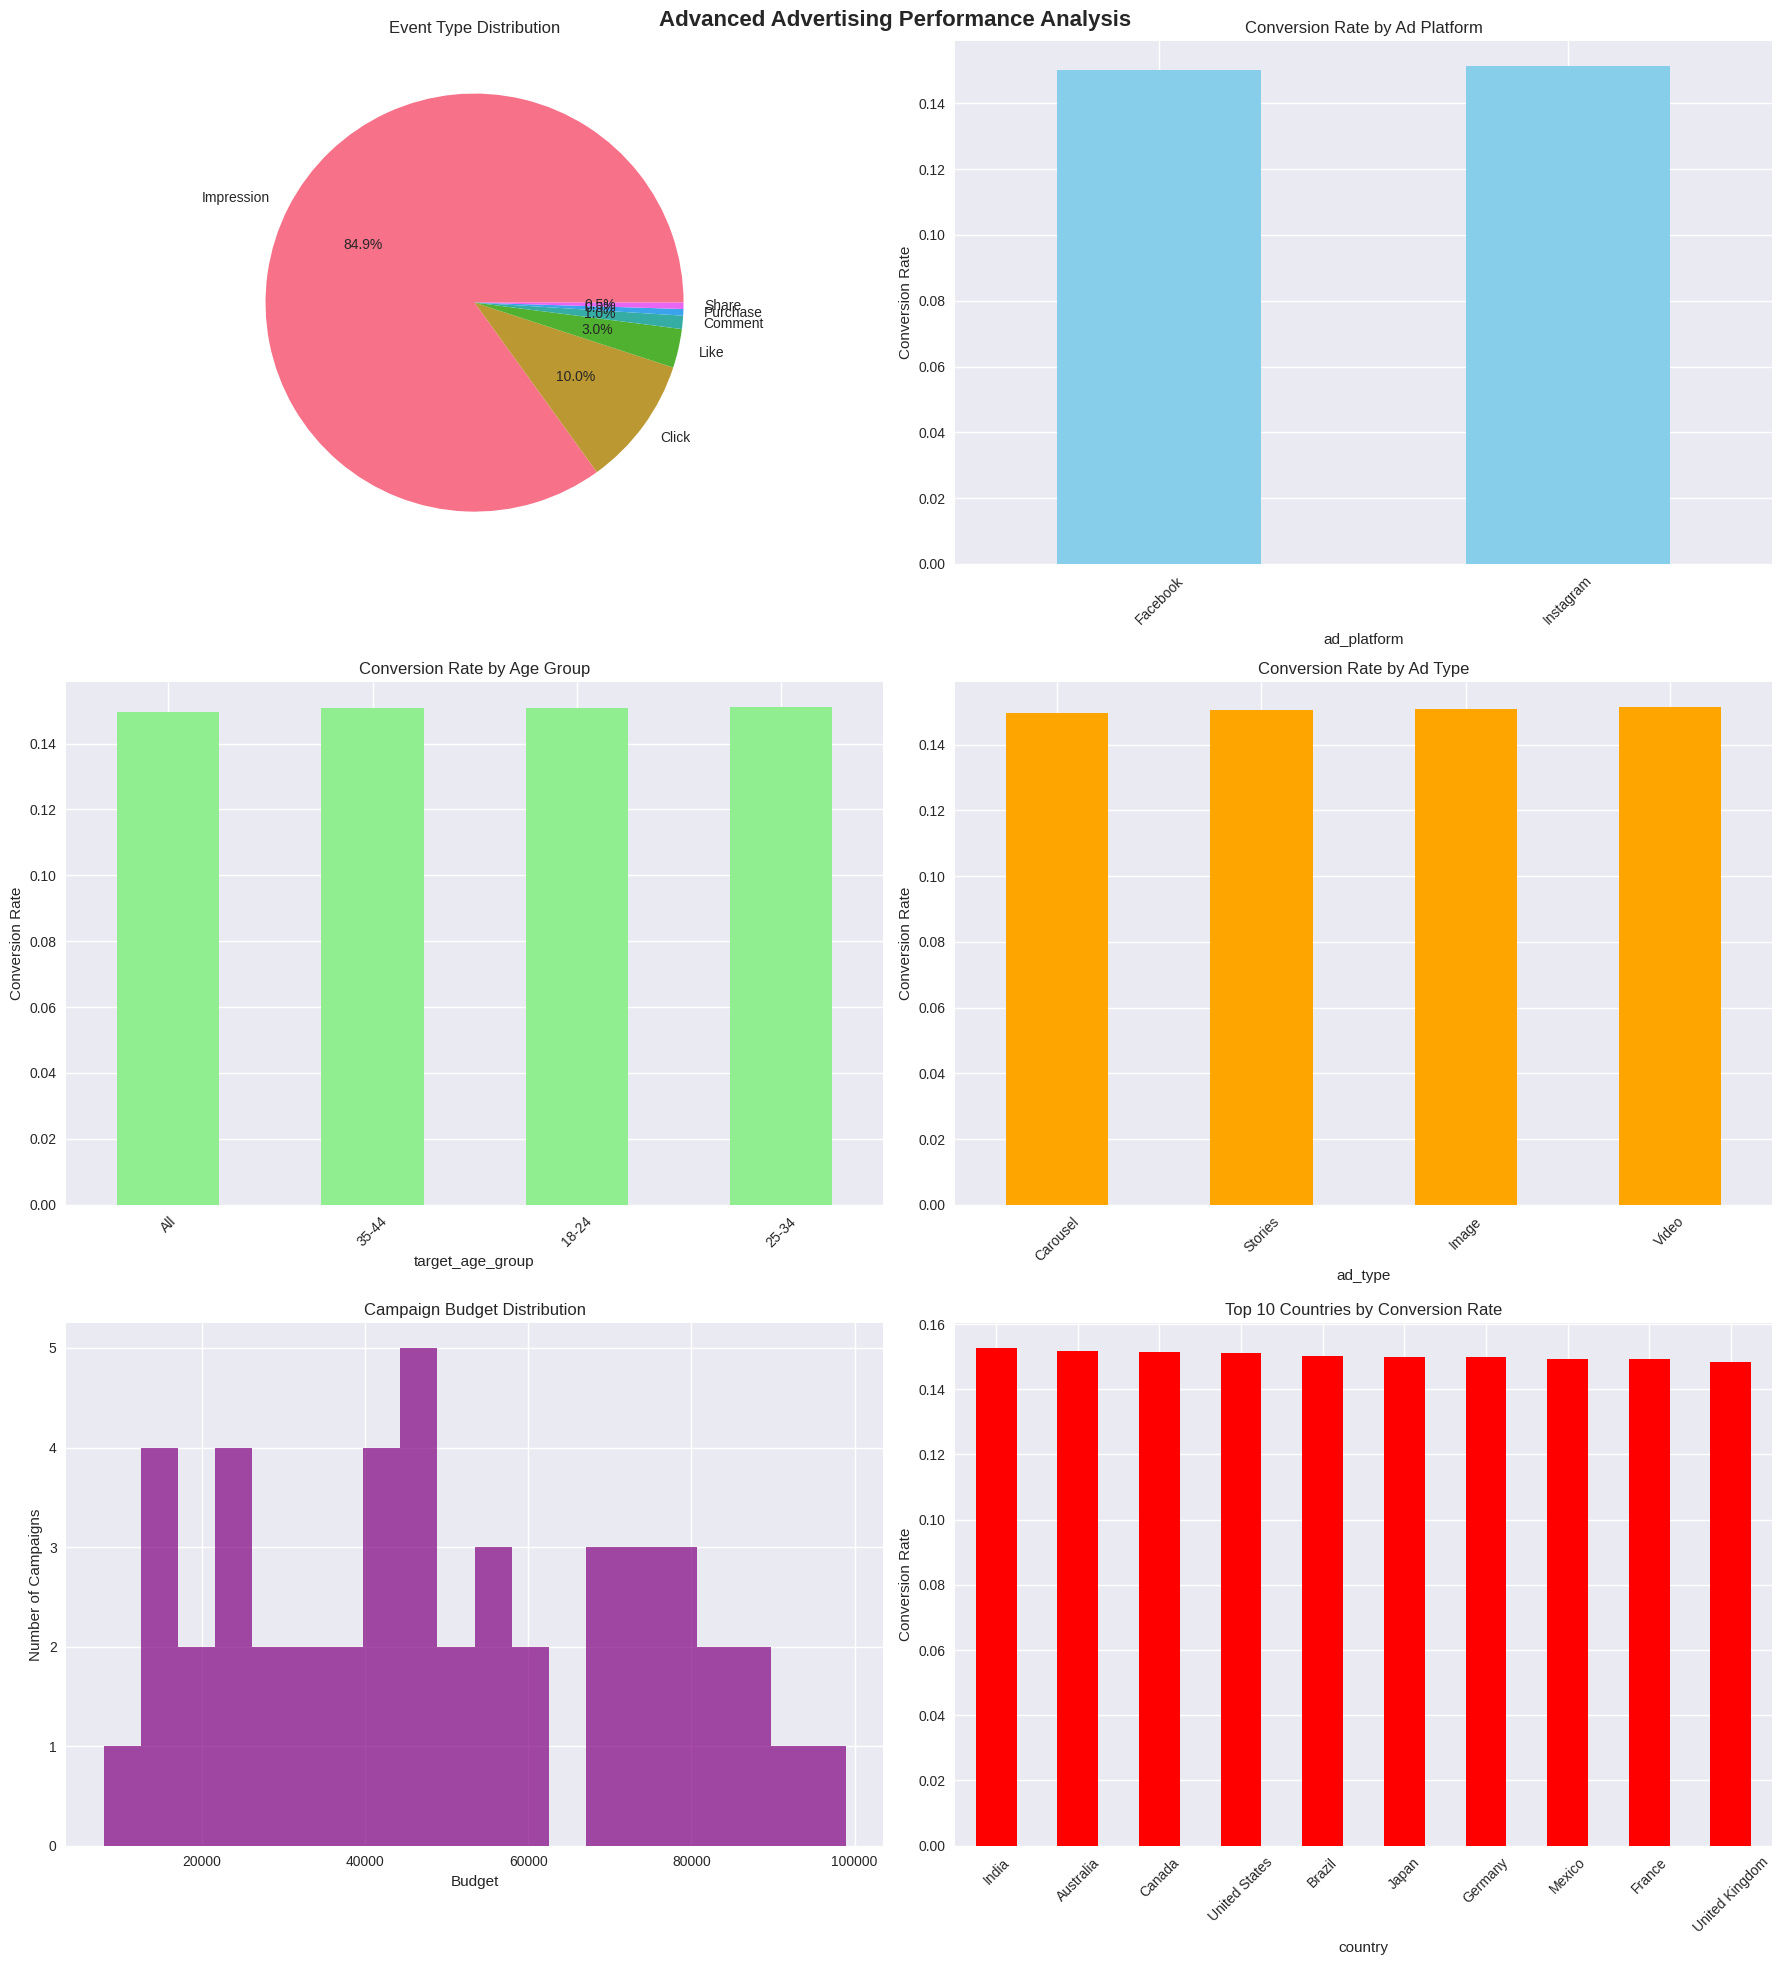

In [56]:
# Visualizations
fig, axes = plt.subplots(3, 2, figsize=(18, 20))
fig.suptitle('Advanced Advertising Performance Analysis', fontsize=16, fontweight='bold')

# 1. Event distribution
event_counts = df['event_type'].value_counts()
axes[0,0].pie(event_counts.values, labels=event_counts.index, autopct='%1.1f%%')
axes[0,0].set_title('Event Type Distribution')
#plt.show()

    # 2. Conversion by platform
conversion_by_platform = df.groupby('ad_platform')['is_conversion'].mean().sort_values()
conversion_by_platform.plot(kind='bar', ax=axes[0,1], color='skyblue')
axes[0,1].set_title('Conversion Rate by Ad Platform')
axes[0,1].set_ylabel('Conversion Rate')
axes[0,1].tick_params(axis='x', rotation=45)
#plt.show()

    # 3. Conversion by age group
conversion_by_age = df.groupby('target_age_group')['is_conversion'].mean().sort_values()
conversion_by_age.plot(kind='bar', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('Conversion Rate by Age Group')
axes[1,0].set_ylabel('Conversion Rate')
axes[1,0].tick_params(axis='x', rotation=45)
#plt.show()

    # 4. Conversion by ad type
conversion_by_ad_type = df.groupby('ad_type')['is_conversion'].mean().sort_values()
conversion_by_ad_type.plot(kind='bar', ax=axes[1,1], color='orange')
axes[1,1].set_title('Conversion Rate by Ad Type')
axes[1,1].set_ylabel('Conversion Rate')
axes[1,1].tick_params(axis='x', rotation=45)
#plt.show()

    # 5. Campaign budget distribution
campaign_budgets = df.groupby('campaign_id')['total_budget'].first()
axes[2,0].hist(campaign_budgets, bins=20, color='purple', alpha=0.7)
axes[2,0].set_title('Campaign Budget Distribution')
axes[2,0].set_xlabel('Budget')
axes[2,0].set_ylabel('Number of Campaigns')
#plt.show()

    # 6. Conversion by country
conversion_by_country = df.groupby('country')['is_conversion'].mean().sort_values(ascending=False).head(10)
conversion_by_country.plot(kind='bar', ax=axes[2,1], color='red')
axes[2,1].set_title('Top 10 Countries by Conversion Rate')
axes[2,1].set_ylabel('Conversion Rate')
axes[2,1].tick_params(axis='x', rotation=45)
#plt.show()

plt.tight_layout()
plt.show()

Loading and merging data...
Performing advanced EDA...
=== BASIC DATA INFORMATION ===
Combined data size: (403967, 33)

=== STATISTICS ===
             event_id          ad_id user_id                      timestamp  \
count   403967.000000  403967.000000  403967                         403967   
unique            NaN            NaN    9950                            NaN   
top               NaN            NaN   9e923                            NaN   
freq              NaN            NaN     196                            NaN   
mean    200034.495771     100.524857     NaN  2025-06-22 01:10:07.907781632   
min          1.000000       1.000000     NaN            2025-05-07 14:11:57   
25%     100030.500000      51.000000     NaN            2025-05-30 07:56:23   
50%     200044.000000     101.000000     NaN            2025-06-22 00:12:50   
75%     300051.500000     151.000000     NaN     2025-07-14 19:46:19.500000   
max     400000.000000     200.000000     NaN            2025-08-06 14:1

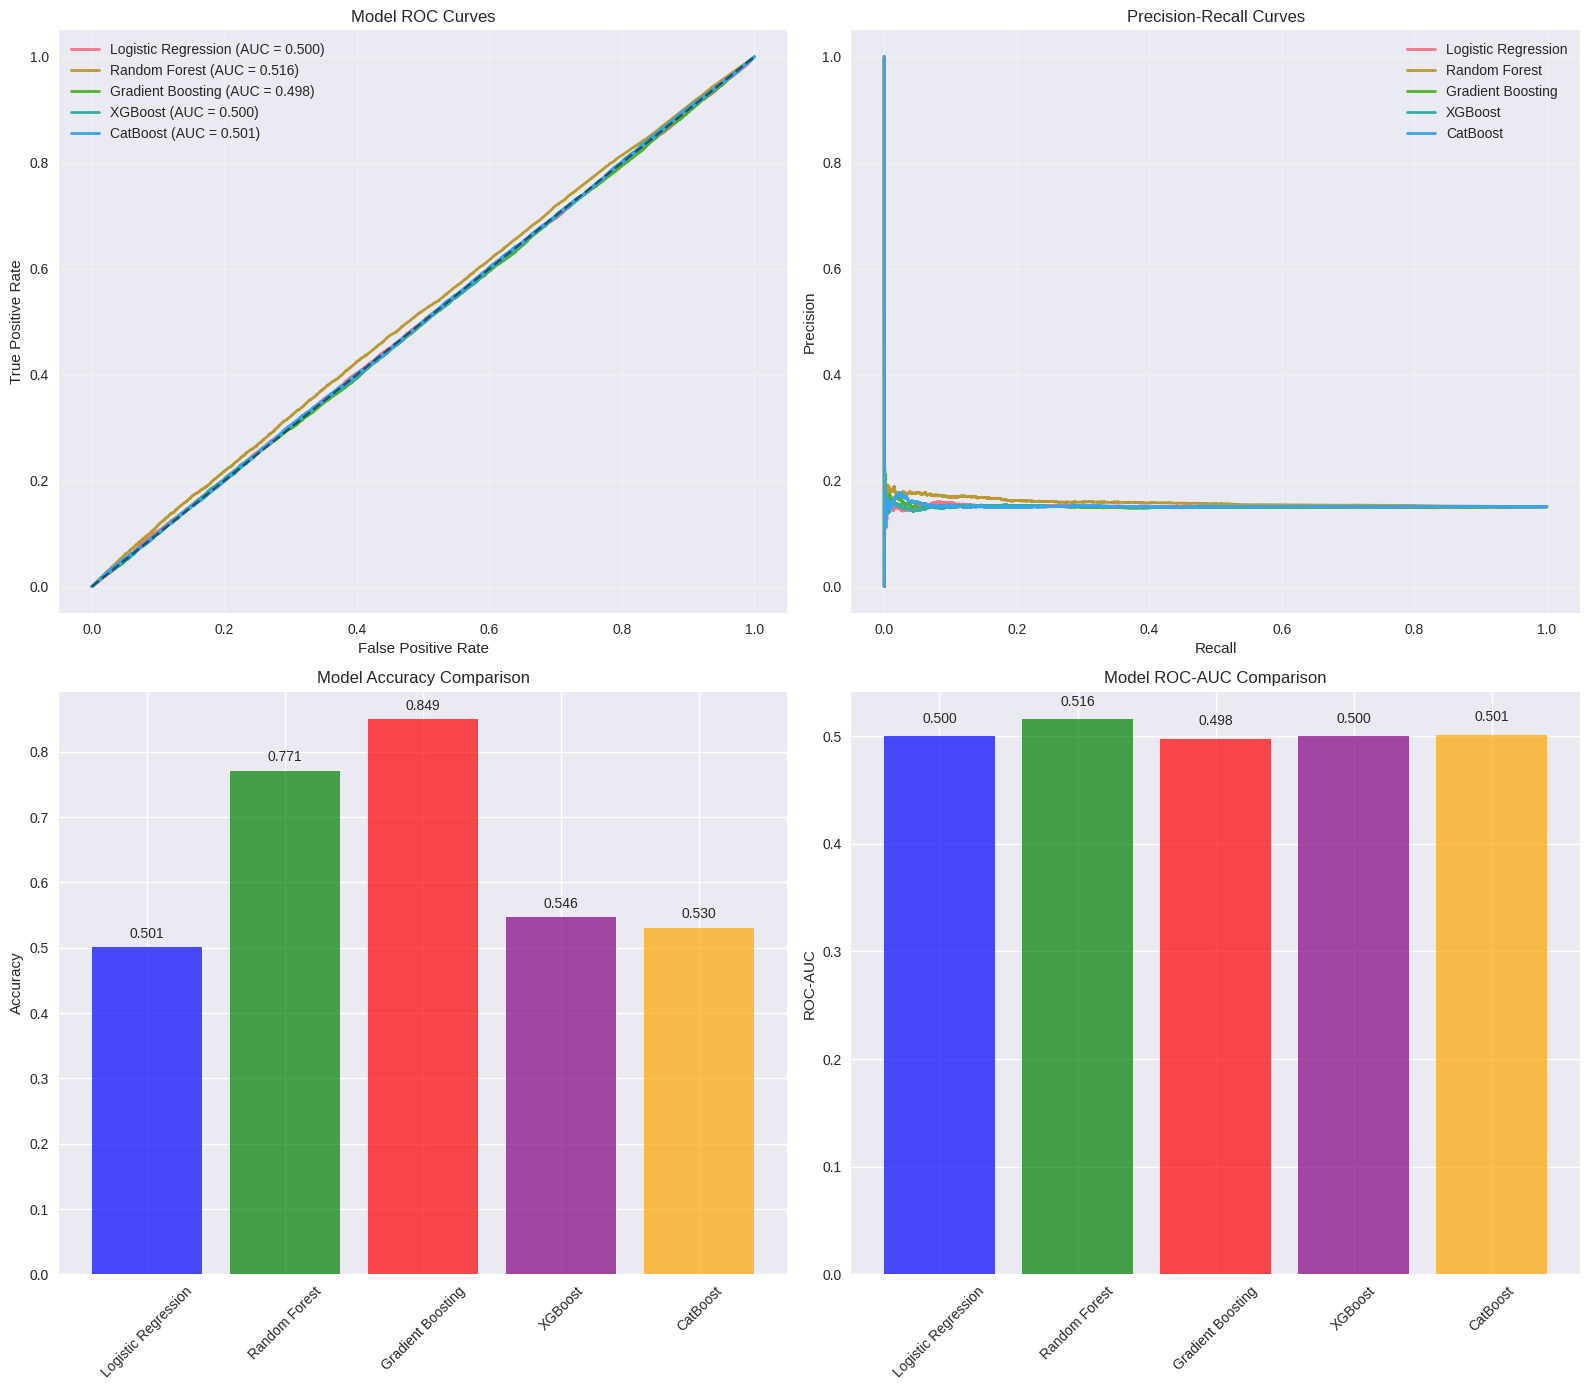

Analyzing feature importance...


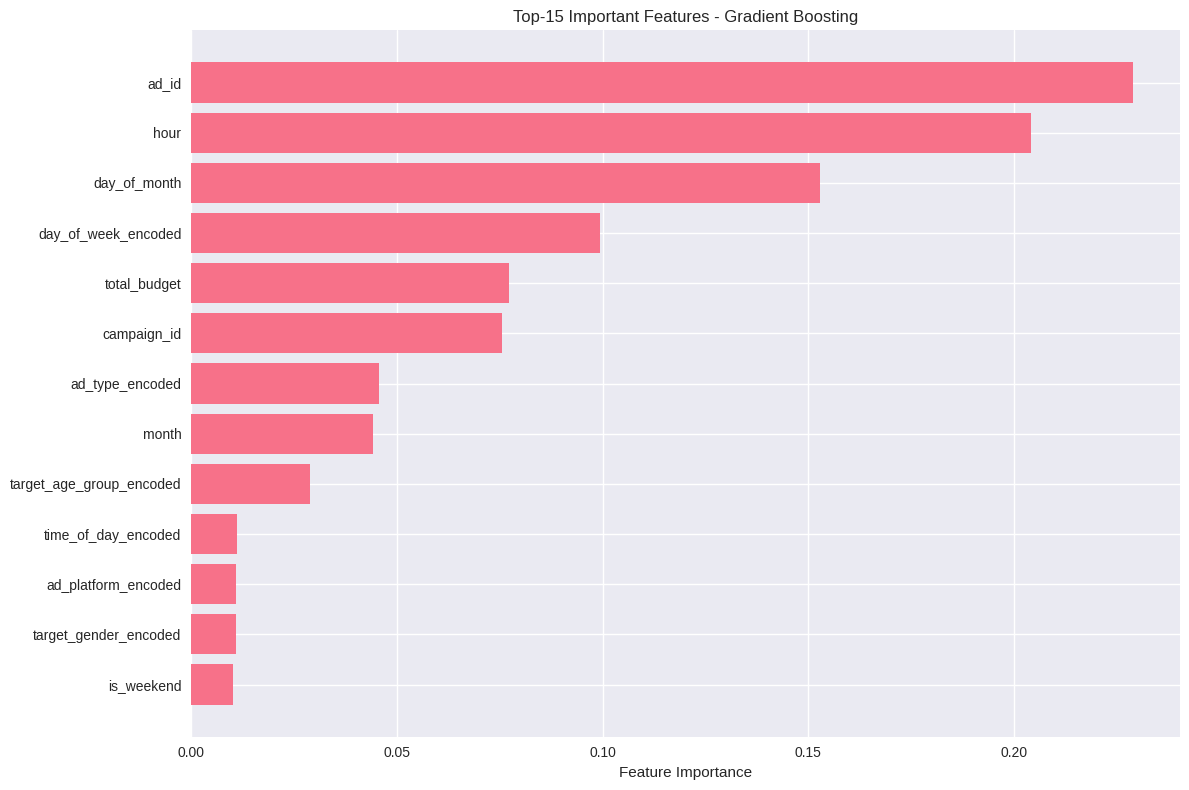


Best model: Gradient Boosting with Accuracy: 0.8495

=== PREDICTION EXAMPLE ===
Predictions for new data:
   ad_id  campaign_id ad_platform  probability conversion_likelihood
0    197           28    Facebook     0.136103                   Low
1     51           33    Facebook     0.149343                   Low
2    166           28   Instagram     0.149738                   Low


In [57]:
# Prepare data for ML
def prepare_data(df):
    # Encode categorical variables
    categorical_cols = [
        'day_of_week', 'time_of_day', 'ad_platform', 'ad_type',
        'target_gender', 'target_age_group'
    ]

    encoders = {}
    for col in categorical_cols:
        if col in df.columns:
            le = LabelEncoder()
            df[col + '_encoded'] = le.fit_transform(df[col].astype(str))
            encoders[col] = le

    # Features for model (only those available for prediction)
    features = [
        'ad_id', 'campaign_id', 'hour', 'day_of_month', 'month',
        'total_budget', 'is_weekend'
    ]

    # Add encoded categorical features
    for col in categorical_cols:
        encoded_col = col + '_encoded'
        if encoded_col in df.columns:
            features.append(encoded_col)

    X = df[features]
    y = df['is_conversion']

    # Handle missing values
    imputer = SimpleImputer(strategy='median')
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y, encoders, scaler, features, imputer

# Train and evaluate models
def train_models(X, y):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Configure models
    models = {
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
        'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced'),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
        'XGBoost': XGBClassifier(random_state=42, n_estimators=100, use_label_encoder=False,
                                eval_metric='logloss', scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1])),
        'CatBoost': CatBoostClassifier(random_state=42, verbose=0, iterations=100,
                                     auto_class_weights='Balanced')
    }

    results = {}

    # Cross-validation
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    for name, model in models.items():
        print(f"\n=== TRAINING {name} ===")

        try:
            # Cross-validation for accuracy
            cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
            print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")

            # Train model
            model.fit(X_train, y_train)

            # Predictions
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]

            # Evaluation
            accuracy = accuracy_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred_proba)

            print(f"Accuracy: {accuracy:.4f}")
            print(f"ROC-AUC: {roc_auc:.4f}")
            print("\nClassification Report:")
            print(classification_report(y_test, y_pred))

            results[name] = {
                'model': model,
                'accuracy': accuracy,
                'roc_auc': roc_auc,
                'y_pred': y_pred,
                'y_pred_proba': y_pred_proba,
                'cv_scores': cv_scores
            }

        except Exception as e:
            print(f"Error training {name}: {e}")
            continue

    return results, X_test, y_test

# Visualize model results
def plot_model_results(results, X_test, y_test):
    if not results:
        print("No results to visualize")
        return

    fig, axes = plt.subplots(2, 2, figsize=(16, 14))

    # ROC curves
    for name, result in results.items():
        fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
        axes[0,0].plot(fpr, tpr, label=f'{name} (AUC = {result["roc_auc"]:.3f})', linewidth=2)

    axes[0,0].plot([0, 1], [0, 1], 'k--', alpha=0.5)
    axes[0,0].set_xlabel('False Positive Rate')
    axes[0,0].set_ylabel('True Positive Rate')
    axes[0,0].set_title('Model ROC Curves')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)

    # Precision-Recall curves
    for name, result in results.items():
        precision, recall, _ = precision_recall_curve(y_test, result['y_pred_proba'])
        axes[0,1].plot(recall, precision, label=name, linewidth=2)

    axes[0,1].set_xlabel('Recall')
    axes[0,1].set_ylabel('Precision')
    axes[0,1].set_title('Precision-Recall Curves')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)

    # Compare accuracy
    accuracies = [result['accuracy'] for result in results.values()]
    names = list(results.keys())
    axes[1,0].bar(names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'], alpha=0.7)
    axes[1,0].set_title('Model Accuracy Comparison')
    axes[1,0].set_ylabel('Accuracy')
    axes[1,0].tick_params(axis='x', rotation=45)

    # Compare ROC-AUC
    roc_aucs = [result['roc_auc'] for result in results.values()]
    axes[1,1].bar(names, roc_aucs, color=['blue', 'green', 'red', 'purple', 'orange'], alpha=0.7)
    axes[1,1].set_title('Model ROC-AUC Comparison')
    axes[1,1].set_ylabel('ROC-AUC')
    axes[1,1].tick_params(axis='x', rotation=45)

    # Add values on bars
    for i, v in enumerate(accuracies):
        axes[1,0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

    for i, v in enumerate(roc_aucs):
        axes[1,1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Feature importance analysis
def plot_feature_importance(results, features):
    if not results:
        print("No results for feature importance analysis")
        return None

    # Select best model based on accuracy instead of ROC-AUC
    best_model_name = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
    best_model = results[best_model_name]['model']

    if hasattr(best_model, 'feature_importances_'):
        importance = best_model.feature_importances_

        # Create DataFrame for feature importance
        feature_importance_df = pd.DataFrame({
            'feature': features,
            'importance': importance
        }).sort_values('importance', ascending=False)

        # Visualize top-15 features
        plt.figure(figsize=(12, 8))
        plt.barh(feature_importance_df['feature'].head(15),
                feature_importance_df['importance'].head(15))
        plt.xlabel('Feature Importance')
        plt.title(f'Top-15 Important Features - {best_model_name}')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

        return feature_importance_df
    else:
        print(f"Model {best_model_name} does not support feature importance analysis")
        return None

# Predict for new data
def predict_new_data(model, new_data, encoders, scaler, features, imputer):
    """
    Predict for new data
    """
    # Copy and transform data
    new_data = new_data.copy()
    new_data['timestamp'] = pd.to_datetime(new_data['timestamp'])
    new_data['hour'] = new_data['timestamp'].dt.hour
    new_data['day_of_month'] = new_data['timestamp'].dt.day
    new_data['month'] = new_data['timestamp'].dt.month
    new_data['is_weekend'] = new_data['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

    # Encode categorical variables
    for col, encoder in encoders.items():
        if col in new_data.columns:
            try:
                new_data[col + '_encoded'] = encoder.transform(new_data[col].astype(str))
            except ValueError:
                # If new value encountered, use most frequent class
                new_data[col + '_encoded'] = 0

    # Create DataFrame with correct columns
    X_new = pd.DataFrame(columns=features)

    # Fill with values
    for feature in features:
        if feature in new_data.columns:
            X_new[feature] = new_data[feature]
        else:
            # Fill missing features with median value
            X_new[feature] = 0

    # Handle missing values
    X_new = pd.DataFrame(imputer.transform(X_new), columns=features)

    # Scale
    X_new_scaled = scaler.transform(X_new)

    # Predictions
    predictions = model.predict(X_new_scaled)
    predictions_proba = model.predict_proba(X_new_scaled)[:, 1]

    return predictions, predictions_proba

# Main function
def main():
    try:
        # Load data
        print("Loading and merging data...")
        df, events_df, ads_df, campaigns_df, users_df = load_and_merge_data(
        'https://raw.githubusercontent.com/Rishabh1108ch/Social_media_Ads_Performance_Gradient-Boosting_Analysis/8e593f32e14baf2f8772b3bf916c09c82e15b433/ad_events.csv',
        'https://raw.githubusercontent.com/Rishabh1108ch/Social_media_Ads_Performance_Gradient-Boosting_Analysis/8e593f32e14baf2f8772b3bf916c09c82e15b433/ads.csv',
        'https://raw.githubusercontent.com/Rishabh1108ch/Social_media_Ads_Performance_Gradient-Boosting_Analysis/8e593f32e14baf2f8772b3bf916c09c82e15b433/campaigns.csv',
        'https://raw.githubusercontent.com/Rishabh1108ch/Social_media_Ads_Performance_Gradient-Boosting_Analysis/8e593f32e14baf2f8772b3bf916c09c82e15b433/users.csv'
    )

        # EDA and visualization
        print("Performing advanced EDA...")
        perform_eda(df)

        # Prepare data for ML
        print("Preparing data for machine learning...")
        X, y, encoders, scaler, features, imputer = prepare_data(df)

        # Train models
        print("Training and evaluating models...")
        results, X_test, y_test = train_models(X, y)

        if not results:
            print("Failed to train any models")
            return

        # Visualize results
        print("Visualizing model results...")
        plot_model_results(results, X_test, y_test)

        # Feature importance analysis
        print("Analyzing feature importance...")
        feature_importance_df = plot_feature_importance(results, features)

        # Select best model based on accuracy
        best_model_name = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
        best_model = results[best_model_name]['model']
        print(f"\nBest model: {best_model_name} with Accuracy: {results[best_model_name]['accuracy']:.4f}")

        # Example prediction for new data
        print("\n=== PREDICTION EXAMPLE ===")
        sample_new_data = pd.DataFrame({
            'ad_id': [197, 51, 166],
            'campaign_id': [28, 33, 28],
            'timestamp': ['2025-08-01 14:30:00', '2025-08-01 20:00:00', '2025-08-02 10:00:00'],
            'day_of_week': ['Thursday', 'Thursday', 'Friday'],
            'time_of_day': ['Afternoon', 'Evening', 'Morning'],
            'ad_platform': ['Facebook', 'Facebook', 'Instagram'],
            'ad_type': ['Video', 'Stories', 'Image'],
            'target_gender': ['Female', 'All', 'Female'],
            'target_age_group': ['35-44', '25-34', '25-34'],
            'total_budget': [24021.32, 79342.41, 24021.32]
        })

        predictions, probabilities = predict_new_data(best_model, sample_new_data, encoders, scaler, features, imputer)

        sample_new_data['prediction'] = predictions
        sample_new_data['probability'] = probabilities
        sample_new_data['conversion_likelihood'] = ['High' if p > 0.5 else 'Low' for p in probabilities]

        print("Predictions for new data:")
        print(sample_new_data[['ad_id', 'campaign_id', 'ad_platform', 'probability', 'conversion_likelihood']])

    except Exception as e:
        print(f"Error in main function: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()